In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(
    filepath_or_buffer='/content/drive/MyDrive/Satelite_Numeric_data/New Dataset 5000.csv')


In [ ]:
df.head()

StationId        Datetime  PM2.5  PM10    NO    NO2    NOx    NH3    CO  \
0     TG002  5/14/2018 0:00  35.25  88.5  2.12  33.10  19.30  14.10  0.96   
1     TG002  5/14/2018 1:00  32.00  73.5  2.17  20.30  12.60  13.80  0.17   
2     TG002  5/14/2018 2:00  20.50  58.0  3.00  17.35  11.65  13.48  1.53   
3     TG002  5/14/2018 3:00  21.00  50.0  2.73  18.28  11.93  13.50  2.96   
4     TG002  5/14/2018 4:00  18.50  43.5  2.20  16.38  10.45  15.13  3.49   

    SO2     O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  1.97  67.25     4.98     7.43    2.70  168   Moderate  
1  2.77  80.75     3.40     4.27    1.57  124   Moderate  
2  2.95  77.22     2.02     2.55    1.18  124   Moderate  
3  2.02  36.35     1.42     1.57    0.80  124   Moderate  
4  2.20  70.90     1.20     1.10    1.03  124   Moderate

In [ ]:
df = df.drop(['StationId', 'Datetime', 'PM2.5', 'PM10', 'AQI_Bucket'], axis=1)

In [ ]:
df.tail()

NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  Toluene  \
5086   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30     7.35   
5087   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22    16.48   
5088  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55    23.40   
5089  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62    24.93   
5090  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65    22.52   

      Xylene  AQI  
5086    3.00  106  
5087    8.20  106  
5088   12.93  106  
5089   15.65  107  
5090   15.62  108

In [ ]:
df.columns=['NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  Toluene  \
5086   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30     7.35   
5087   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22    16.48   
5088  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55    23.40   
5089  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62    24.93   
5090  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65    22.52   

      Xylene  AQI  
5086    3.00  106  
5087    8.20  106  
5088   12.93  106  
5089   15.65  107  
5090   15.62  108

In [ ]:
X = df.loc[:, 'NO':'Xylene'].values
y = df['AQI'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
# COvariance matrix

import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00019646  0.33629993  0.60819     0.12478496  0.33434546  0.06893179
  -0.17353783  0.35952751  0.29052589  0.39498179]
 [ 0.33629993  1.00019646  0.95180691  0.56778598  0.62938985  0.41621007
  -0.06808116  0.7453067   0.6095303   0.70238404]
 [ 0.60819     0.95180691  1.00019646  0.51820875  0.64131299  0.37264625
  -0.11185871  0.74574032  0.60837258  0.72126447]
 [ 0.12478496  0.56778598  0.51820875  1.00019646  0.43778267  0.31927145
   0.30422181  0.59247188  0.47082993  0.35179404]
 [ 0.33434546  0.62938985  0.64131299  0.43778267  1.00019646  0.1846075
   0.09574923  0.56839049  0.45755021  0.53172383]
 [ 0.06893179  0.41621007  0.37264625  0.31927145  0.1846075   1.00019646
   0.24319169  0.41650239  0.38614127  0.17990277]
 [-0.17353783 -0.06808116 -0.11185871  0.30422181  0.09574923  0.24319169
   1.00019646  0.00348086 -0.03954711 -0.1388311 ]
 [ 0.35952751  0.7453067   0.74574032  0.59247188  0.56839049  0.41650239
   0.00348086  1.00019646  0.8665

In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))


NumPy covariance matrix: 
[[ 1.00019646  0.33629993  0.60819     0.12478496  0.33434546  0.06893179
  -0.17353783  0.35952751  0.29052589  0.39498179]
 [ 0.33629993  1.00019646  0.95180691  0.56778598  0.62938985  0.41621007
  -0.06808116  0.7453067   0.6095303   0.70238404]
 [ 0.60819     0.95180691  1.00019646  0.51820875  0.64131299  0.37264625
  -0.11185871  0.74574032  0.60837258  0.72126447]
 [ 0.12478496  0.56778598  0.51820875  1.00019646  0.43778267  0.31927145
   0.30422181  0.59247188  0.47082993  0.35179404]
 [ 0.33434546  0.62938985  0.64131299  0.43778267  1.00019646  0.1846075
   0.09574923  0.56839049  0.45755021  0.53172383]
 [ 0.06893179  0.41621007  0.37264625  0.31927145  0.1846075   1.00019646
   0.24319169  0.41650239  0.38614127  0.17990277]
 [-0.17353783 -0.06808116 -0.11185871  0.30422181  0.09574923  0.24319169
   1.00019646  0.00348086 -0.03954711 -0.1388311 ]
 [ 0.35952751  0.7453067   0.74574032  0.59247188  0.56839049  0.41650239
   0.00348086  1.00019646 

In [ ]:
# Eigen Vector and eigen values on standarized data x // covariance matrix

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01  3.89778417e-01 -2.40704428e-01 -3.85584476e-01
   6.25111175e-01 -2.10257008e-02  8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01  1.84027550e-02 -6.24942354e-01  2.32660343e-02
  -1.71146979e-02 -1.05291558e-02 -4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01  1.41700392e-01  7.42618419e-01 -1.07607082e-01
   1.87715293e-01 -1.14617198e-02 -3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01 -3.79954398e-01  2.65502669e-03 -1.97385887e-01
  -2.30770763e-01 -1.43396196e-01  3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01 -1.29291446e-02 -2.30486922e-03 -4.56546556e-01
  -1.62930769e-01 -2.57750261e-02  1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01 -4.10866915e-01  8.41526849e-04  4.90635326e-01
   6.06265034e-01 -5.66568417e-02  3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [ ]:
# Eigen value and vector on correlation matrix

cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01  3.89778417e-01 -2.40704428e-01 -3.85584476e-01
   6.25111175e-01 -2.10257008e-02  8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01  1.84027550e-02 -6.24942354e-01  2.32660343e-02
  -1.71146979e-02 -1.05291558e-02 -4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01  1.41700392e-01  7.42618419e-01 -1.07607082e-01
   1.87715293e-01 -1.14617198e-02 -3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01 -3.79954398e-01  2.65502669e-03 -1.97385887e-01
  -2.30770763e-01 -1.43396196e-01  3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01 -1.29291446e-02 -2.30486922e-03 -4.56546556e-01
  -1.62930769e-01 -2.57750261e-02  1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01 -4.10866915e-01  8.41526849e-04  4.90635326e-01
   6.06265034e-01 -5.66568417e-02  3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [ ]:
# eigen value on original x

cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01  3.89778417e-01 -2.40704428e-01 -3.85584476e-01
   6.25111175e-01 -2.10257008e-02  8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01  1.84027550e-02 -6.24942354e-01  2.32660343e-02
  -1.71146979e-02 -1.05291558e-02 -4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01  1.41700392e-01  7.42618419e-01 -1.07607082e-01
   1.87715293e-01 -1.14617198e-02 -3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01 -3.79954398e-01  2.65502669e-03 -1.97385887e-01
  -2.30770763e-01 -1.43396196e-01  3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01 -1.29291446e-02 -2.30486922e-03 -4.56546556e-01
  -1.62930769e-01 -2.57750261e-02  1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01 -4.10866915e-01  8.41526849e-04  4.90635326e-01
   6.06265034e-01 -5.66568417e-02  3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [ ]:
# SVD

u,s,v = np.linalg.svd(X_std.T)
u

array([[-2.19409922e-01,  3.89778417e-01,  3.85584476e-01,
        -6.25111175e-01, -3.99343330e-01, -1.66818402e-01,
        -8.53138791e-02,  8.67759618e-02, -2.10257008e-02,
         2.40704428e-01],
       [-3.96622389e-01,  1.84027550e-02, -2.32660343e-02,
         1.71146979e-02,  4.54766298e-01, -8.36993228e-02,
         2.48436099e-01, -4.18706975e-01, -1.05291558e-02,
         6.24942354e-01],
       [-4.05762227e-01,  1.41700392e-01,  1.07607082e-01,
        -1.87715293e-01,  2.52522850e-01, -1.19753758e-01,
         1.81722156e-01, -3.25140766e-01, -1.14617198e-02,
        -7.42618419e-01],
       [-2.83960814e-01, -3.79954398e-01,  1.97385887e-01,
         2.30770763e-01,  2.57732754e-02, -7.24261764e-01,
        -1.27665605e-01,  3.47415008e-01, -1.43396196e-01,
        -2.65502669e-03],
       [-3.14791219e-01, -1.29291446e-02,  4.56546556e-01,
         1.62930769e-01,  2.93178664e-01,  5.03592670e-01,
        -5.41614410e-01,  1.79396187e-01, -2.57750261e-02,
         2.

In [ ]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [ ]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.197067527993017
1.4790219555014212
0.8307450519490793
0.7509509109251069
0.5636988437019087
0.49692299733534606
0.3756080027798305
0.21591232024374596
0.0896224116810138
0.00044997788953076784


In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

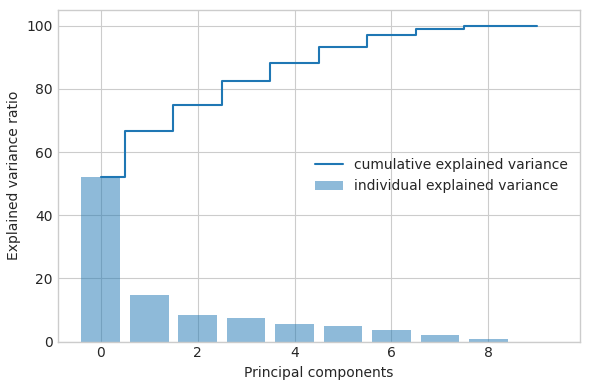

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(10), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(10), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1),
                      eig_pairs[1][1].reshape(10,1),
                      eig_pairs[2][1].reshape(10,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.21940992  0.38977842 -0.38558448]
 [-0.39662239  0.01840276  0.02326603]
 [-0.40576223  0.14170039 -0.10760708]
 [-0.28396081 -0.3799544  -0.19738589]
 [-0.31479122 -0.01292914 -0.45654656]
 [-0.20157312 -0.41086692  0.49063533]
 [ 0.00156891 -0.68575153 -0.43134357]
 [-0.40044602 -0.04296907  0.19488747]
 [-0.35198061 -0.03194383  0.35324283]
 [-0.35397483  0.20295094  0.04760409]]


In [ ]:
Y = X_std.dot(matrix_w)


In [ ]:
Y

array([[-0.19765723, -0.5380899 , -1.07289608],
       [ 1.21126969, -0.93313901, -0.45784207],
       [ 0.41448767, -0.84852628, -2.20199809],
       ...,
       [-6.73630432,  2.48391753, -1.16867977],
       [-7.47823741,  2.92194657, -1.288714  ],
       [-6.45570324,  2.19190377, -0.72960715]])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [ ]:
data = pd.DataFrame(Y, columns=['col1', 'col2', 'col3'])


In [ ]:
data

col1      col2      col3
0    -0.197657 -0.538090 -1.072896
1     1.211270 -0.933139 -0.457842
2     0.414488 -0.848526 -2.201998
3    -0.606004  0.056695 -3.443593
4    -1.009638 -0.875476 -4.594629
...        ...       ...       ...
5086 -1.835952  0.170261 -0.971045
5087 -4.307215  1.096530 -0.695345
5088 -6.736304  2.483918 -1.168680
5089 -7.478237  2.921947 -1.288714
5090 -6.455703  2.191904 -0.729607

[5091 rows x 3 columns]

In [ ]:
X= data.values
y = df['AQI'].values

In [ ]:
X.shape

(5091, 3)

In [ ]:
y.shape

(5091,)

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.2, random_state=30)

In [ ]:
X_train

array([[ 1.2196729 , -1.15619031, -1.44598332],
       [-3.17269662,  0.65266829,  1.6127631 ],
       [-2.32090341,  0.27781216, -2.37638389],
       ...,
       [ 1.72350627,  0.98439876, -0.19410574],
       [-1.9110869 , -0.41285573, -0.33683098],
       [-1.44663592, -1.69947606, -1.19389238]])

In [ ]:
X_test

array([[-1.81067242, -0.90323514, -0.08991873],
       [ 1.52787031,  0.74039308,  0.70172946],
       [-1.43360486, -0.7078778 , -0.73656537],
       ...,
       [ 1.72455725,  0.3586325 , -0.1821482 ],
       [ 0.93050578,  0.76754466, -0.41627986],
       [-1.95190853, -1.83386723, -1.09118509]])

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [ ]:
lm=LinearRegression()
lm

LinearRegression()

In [ ]:
lm.fit(X_train,Y_train)


LinearRegression()

In [ ]:
rid=Ridge()
rid

Ridge()

In [ ]:
rid.fit(X_train,Y_train)


Ridge()

In [ ]:
la=Lasso()
la

Lasso()

In [ ]:
la.fit(X_train,Y_train)


Lasso()

In [ ]:
elNet=ElasticNet()
elNet

ElasticNet()

In [ ]:
elNet.fit(X_train,Y_train)


ElasticNet()

In [ ]:

pred_test_lm=lm.predict(X_test)
pred_test_rid=rid.predict(X_test)
pred_test_la=la.predict(X_test)

pred_test_elNet=elNet.predict(X_test)

In [ ]:
print("Linear Regression Model")
metrics.mean_squared_error(Y_test,pred_test_lm)



Linear Regression Model


461.9732779650596

In [ ]:
metrics.r2_score(Y_test,pred_test_lm)


0.7403091747145234

In [ ]:
lm.score(X_test,Y_test)


0.7403091747145234

In [ ]:

print("Ridge Regression Model")
metrics.mean_squared_error(Y_test,pred_test_rid)

Ridge Regression Model


461.979769184814

In [ ]:
metrics.r2_score(Y_test,pred_test_rid)


0.74030552578006

In [ ]:

print("Lassso Regression Model")
metrics.mean_squared_error(Y_test,pred_test_la)

Lassso Regression Model


467.1965145279699

In [ ]:
metrics.r2_score(Y_test,pred_test_la)


0.7373730165461152

In [ ]:
print("ElasticNet Regression Model")
metrics.mean_squared_error(Y_test,pred_test_elNet)

ElasticNet Regression Model


527.0298084049721

In [ ]:
metrics.r2_score(Y_test,pred_test_elNet)


0.7037386956717326

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
parameters={'alpha':[1,5,10,20,35,45,50,55,60,75,85,90,100]}
ridge_regressor=GridSearchCV(rid,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 5, 10, 20, 35, 45, 50, 55, 60, 75, 85, 90,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_regressor.best_params_


{'alpha': 10}

In [ ]:
ridge_regressor.best_score_


-462.3988220627978

In [ ]:
best_alpha = 10
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, Y_train)

# Predict on the test set
pred_test_ridge = ridge.predict(X_test)

# Calculate R-squared score and Mean Squared Error
r2_ridge = metrics.r2_score(Y_test, pred_test_ridge)
mse_ridge = metrics.mean_squared_error(Y_test, pred_test_ridge)

print("Ridge Regression Model")
print("R-squared Score:", r2_ridge)
print("Mean Squared Error:", mse_ridge)



Ridge Regression Model
R-squared Score: 0.7402716711608992
Mean Squared Error: 462.0399943751755


In [ ]:

parameters={'alpha':[1e-4,1e-3,1e-2,1,5,10,20,35,45,50,55,60,75,85,90,100]}
lasso_regressor=GridSearchCV(la,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 5, 10, 20, 35, 45,
                                   50, 55, 60, 75, 85, 90, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regressor.best_params_


{'alpha': 0.01}

In [ ]:
lasso_regressor.best_score_


-462.4003160058563

In [ ]:
best_alpha = 0.01
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, Y_train)

# Predict on the test set
pred_test_lasso = lasso.predict(X_test)

# Calculate R-squared score and Mean Squared Error
r2_lasso = metrics.r2_score(Y_test, pred_test_lasso)
mse_lasso = metrics.mean_squared_error(Y_test, pred_test_lasso)

print("lasso Regression Model")
print("R-squared Score:", r2_lasso)
print("Mean Squared Error:", mse_lasso)



lasso Regression Model
R-squared Score: 0.7402903479847174
Mean Squared Error: 462.0067695066738


In [ ]:

parameters={'alpha':[1e-4,1e-3,1e-2,1,5,10,20,35,45,50,55,60,75,85,90,100]}
elNet_regressor=GridSearchCV(elNet,parameters,scoring='neg_mean_squared_error',cv=5)
elNet_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 5, 10, 20, 35, 45,
                                   50, 55, 60, 75, 85, 90, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
elNet_regressor.best_params_


{'alpha': 0.001}

In [ ]:
elNet_regressor.best_score_


-462.400100772995

In [ ]:
best_alpha = 0.001
elastic = ElasticNet(alpha=best_alpha)
elastic.fit(X_train, Y_train)

# Predict on the test set
pred_test_elastic = elastic.predict(X_test)

# Calculate R-squared score and Mean Squared Error
r2_elastic = metrics.r2_score(Y_test, pred_test_elastic)
mse_elastic = metrics.mean_squared_error(Y_test, pred_test_elastic)

print("elastic Regression Model")
print("R-squared Score:", r2_elastic)
print("Mean Squared Error:", mse_elastic)



elastic Regression Model
R-squared Score: 0.740300775663641
Mean Squared Error: 461.9882193364524


Text(0.5, 1.0, 'Linear Regression')

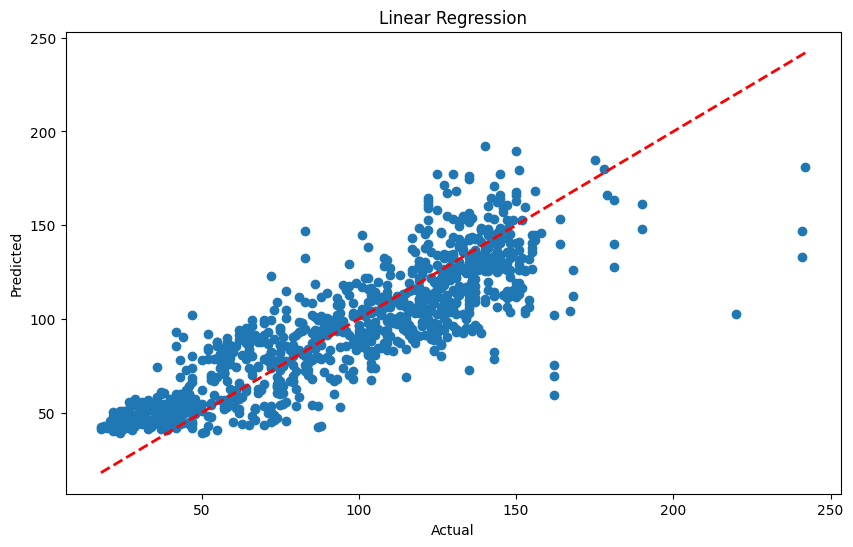

In [ ]:
plt.figure(figsize=(10, 6))

# Linear Regression
plt.subplot(1, 1, 1)
plt.scatter(Y_test, pred_test_lm)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Text(0.5, 1.0, 'Ridge Regression')

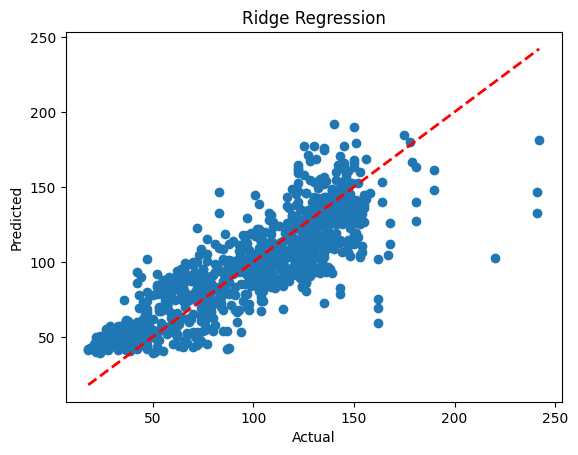

In [ ]:
# Ridge Regression
plt.subplot(1, 1, 1)
plt.scatter(Y_test, pred_test_rid)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression')

Text(0.5, 1.0, 'Lasso Regression')

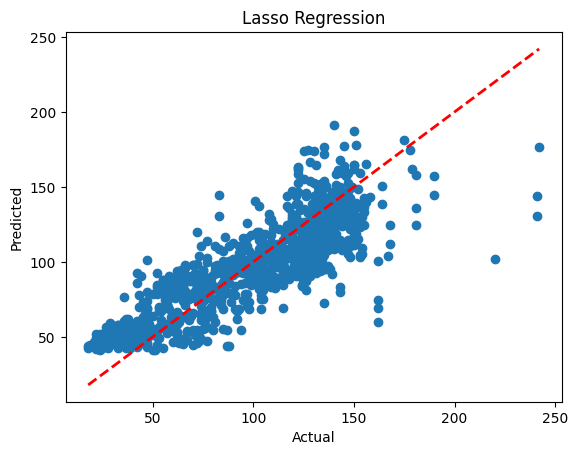

In [ ]:
plt.subplot(1, 1, 1)
plt.scatter(Y_test, pred_test_la)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')

Text(0.5, 1.0, 'ElasticNet Regression')

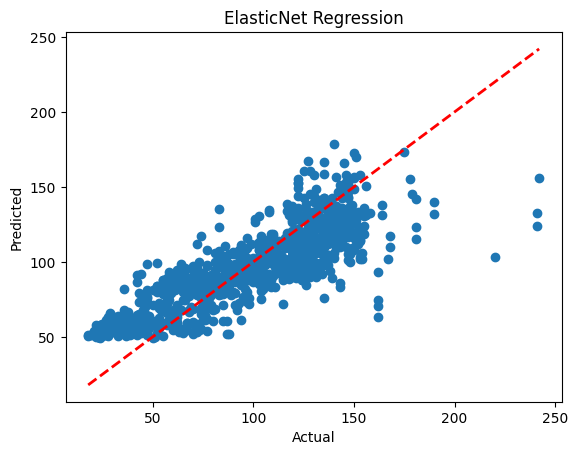

In [ ]:
plt.subplot(1, 1, 1)
plt.scatter(Y_test, pred_test_elNet)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('ElasticNet Regression')

In [ ]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, Y_train)

SVR(kernel='linear')

In [ ]:
svr_linear.score(X_test,Y_test)


0.7361002843468563

In [ ]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, Y_train)

SVR()

In [ ]:
svr_rbf.score(X_test,Y_test)


0.7671773205184449

In [ ]:
from sklearn.metrics import mean_squared_error
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(Y_test,svr_linear.predict(X_test))))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(Y_test,svr_rbf.predict(X_test))))


RMSE for linear SVR: 21.66704002081249
RMSE for RBF kernelized SVR: 20.35132856642766


In [ ]:
from sklearn.metrics import r2_score
print('r2 score :', r2_score(Y_test,svr_linear.predict(X_test)))
print('r2 score :', r2_score(Y_test,svr_rbf.predict(X_test)))


r2 score : 0.7361002843468563
r2 score : 0.7671773205184449


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
params = {'C':[0.01,0.05,0.1,0.5,1,2,5,20,30,40,50,100,200],'epsilon':[0.1,0.2,0.5,1,2,5,0.01]}
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)
grid.fit(X_train,Y_train)


Fitting 5 folds for each of 91 candidates, totalling 455 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 20, 30, 40, 50,
                               100, 200],
                         'epsilon': [0.1, 0.2, 0.5, 1, 2, 5, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
grid.best_estimator_


SVR(C=200, epsilon=5)

In [ ]:
svr_best=SVR(kernel='rbf',gamma='scale', C=200.0, epsilon=5.0)
svr_best.fit(X_train, Y_train)

SVR(C=200.0, epsilon=5.0)

In [ ]:
svr_best.score(X_test,Y_test)


0.7853311562968759

In [ ]:
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(Y_test,svr_best.predict(X_test))))
print('Accuracy',100- (np.mean(np.abs((Y_test - svr_best.predict(X_test)) / Y_test)) * 100))


RMSE for RBF kernelized SVR: 19.54180308996972
Accuracy 80.52305652069622


In [ ]:
params = {'C':[0.01,0.05,0.1,0.5,1,2,5,20],'epsilon':[0.1,0.2,0.5,1,2,0.01]}
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)
grid.fit(X_train,Y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 20],
                         'epsilon': [0.1, 0.2, 0.5, 1, 2, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
grid.best_estimator_


SVR(C=20, epsilon=2)

In [ ]:
svr_best=SVR(kernel='rbf',gamma='scale', C=20.0, epsilon=2.0)
svr_best.fit(X_train, Y_train)

SVR(C=20.0, epsilon=2.0)

In [ ]:
svr_best.score(X_test,Y_test)


0.7821068750517585

In [ ]:
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(Y_test,svr_best.predict(X_test))))
print('Accuracy',100- (np.mean(np.abs((Y_test - svr_best.predict(X_test)) / Y_test)) * 100))


RMSE for RBF kernelized SVR: 19.688013028106337
Accuracy 80.12497640615953


# ANN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import os
import shutil
import pickle as pk

from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn import metrics

In [ ]:
data

col1      col2      col3
0    -0.197657 -0.538090 -1.072896
1     1.211270 -0.933139 -0.457842
2     0.414488 -0.848526 -2.201998
3    -0.606004  0.056695 -3.443593
4    -1.009638 -0.875476 -4.594629
...        ...       ...       ...
5086 -1.835952  0.170261 -0.971045
5087 -4.307215  1.096530 -0.695345
5088 -6.736304  2.483918 -1.168680
5089 -7.478237  2.921947 -1.288714
5090 -6.455703  2.191904 -0.729607

[5091 rows x 3 columns]

In [ ]:
X

array([[-0.19765723, -0.5380899 , -1.07289608],
       [ 1.21126969, -0.93313901, -0.45784207],
       [ 0.41448767, -0.84852628, -2.20199809],
       ...,
       [-6.73630432,  2.48391753, -1.16867977],
       [-7.47823741,  2.92194657, -1.288714  ],
       [-6.45570324,  2.19190377, -0.72960715]])

In [ ]:
y

array([168, 124, 124, ..., 106, 107, 108])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3563, 3)
(3563,)
(1528, 3)
(1528,)


In [ ]:
checkpoint_no = 'ckpt_1_NN'
model_name = 'satellite_ANN_2FC_F64_64_epoch_120'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=128, input_dim=3, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=64, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
179/179 [==============================] - 2s 4ms/step - loss: 8825.3086 - val_loss: 7343.0576
Epoch 2/50
179/179 [==============================] - 1s 4ms/step - loss: 6551.8735 - val_loss: 5697.6924
Epoch 3/50
179/179 [==============================] - 1s 4ms/step - loss: 5138.0566 - val_loss: 4508.3535
Epoch 4/50
179/179 [==============================] - 1s 4ms/step - loss: 4096.0947 - val_loss: 3624.7566
Epoch 5/50
179/179 [==============================] - 1s 4ms/step - loss: 3321.2991 - val_loss: 2972.6814
Epoch 6/50
179/179 [==============================] - 1s 4ms/step - loss: 2759.1213 - val_loss: 2510.1611
Epoch 7/50
179/179 [==============================] - 1s 4ms/step - loss: 2364.9287 - val_loss: 2192.0376
Epoch 8/50
179/179 [==============================] - 1s 4ms/step - loss: 2098.6997 - val_loss: 1983.7804
Epoch 9/50
179/179 [==============================] - 1s 4ms/step - loss: 1923.2517 - val_loss: 1850.8331
Epoch 10/50
179/179 [=========================

In [ ]:
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name,
                                   monitor='val_loss', save_best_only=True, mode='auto')]

In [ ]:
model.evaluate(X_test, y_test)

48/48 [==============================] - 0s 2ms/step - loss: 398.4415


398.4414978027344

In [ ]:
!pip install scikeras

In [ ]:
# Function to generate Deep ANN model
def make_regression_ann(Optimizer_trial='adam'):
    from keras.models import Sequential
    from keras.layers import Dense

    model = Sequential()
    model.add(Dense(units=5, input_dim=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

###########################################
from sklearn.model_selection import GridSearchCV
import scikeras
from scikeras.wrappers import KerasRegressor


# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20,50],
                 }

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel,
                         param_grid=Parameter_Trials,
                         scoring=custom_Scoring,
                         cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_

Epoch 1/10
408/408 [==============================] - 3s 4ms/step - loss: 10173.1982
Epoch 2/10
408/408 [==============================] - 1s 3ms/step - loss: 4418.0532
Epoch 3/10
408/408 [==============================] - 2s 4ms/step - loss: 955.0933
Epoch 4/10
408/408 [==============================] - 1s 4ms/step - loss: 649.6877
Epoch 5/10
408/408 [==============================] - 1s 3ms/step - loss: 540.4952
Epoch 6/10
408/408 [==============================] - 1s 3ms/step - loss: 472.3105
Epoch 7/10
408/408 [==============================] - 1s 3ms/step - loss: 435.8509
Epoch 8/10
408/408 [==============================] - 1s 3ms/step - loss: 418.5201
Epoch 9/10
408/408 [==============================] - 1s 3ms/step - loss: 407.8983
Epoch 10/10
408/408 [==============================] - 1s 3ms/step - loss: 404.1689
###################################################################### Accuracy: 71.8075197169513
Epoch 1/10
408/408 [==============================] - 2s 3ms/step - 

{'batch_size': 20, 'epochs': 10}

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=0)

# Generating Predictions on testing data
Predictions = model.predict(X_test)  # Flatten the predictions


48/48 [==============================] - 0s 2ms/step


In [ ]:
df_testY = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(Predictions)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

Actual   Predicted
0         59   79.220474
1         65   89.140625
2         45   54.624493
3        142  125.829971
4        126  114.977905
...      ...         ...
1523      37   54.939892
1524     109   87.449303
1525     124  137.739273
1526     142  148.734085
1527      91  111.454300

[1528 rows x 2 columns]

In [ ]:
APE = 100 * (abs(df_results['Actual'] - df_results['Predicted']) / df_results['Actual'])
df_results['APE'] = APE

# Calculate the accuracy of the ANN model
accuracy = 100 - np.mean(APE)
print('The Accuracy of ANN model is:', accuracy)
df_results.head()

The Accuracy of ANN model is: 79.38753033293855


Actual   Predicted        APE
0      59   79.220474  34.271990
1      65   89.140625  37.139423
2      45   54.624493  21.387761
3     142  125.829971  11.387344
4     126  114.977905   8.747694

In [ ]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, Predictions))
print('r2 score :', r2_score(y_test, Predictions))


Mean Absolute Error: 14.477250860623665
Mean Squared Error: 383.4169893430669
Root Mean Squared Error: 19.581036472645337
Mean Absolute Percentage Error: 0.2061246966706144
r2 score : 0.7732072998083463


In [ ]:
y_test.shape

(1528,)

In [ ]:
y_test_pred.shape

(1528, 1)

Mean Squared Error: 374.6219535383398
R2 Score: 0.7784095990644484


KeyError: ignored

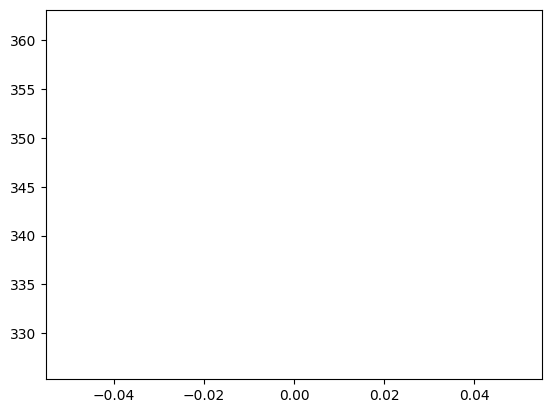

In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Epoch')
plt.legend()
plt.show()

Epoch 1/10
48/48 [==============================] - 0s 2ms/step
Epoch 2/10
48/48 [==============================] - 0s 2ms/step
Epoch 3/10
48/48 [==============================] - 0s 2ms/step
Epoch 4/10
48/48 [==============================] - 0s 2ms/step
Epoch 5/10
48/48 [==============================] - 0s 2ms/step
Epoch 6/10
48/48 [==============================] - 0s 2ms/step
Epoch 7/10
48/48 [==============================] - 0s 2ms/step
Epoch 8/10
48/48 [==============================] - 0s 2ms/step
Epoch 9/10
48/48 [==============================] - 0s 2ms/step
Epoch 10/10
48/48 [==============================] - 0s 2ms/step


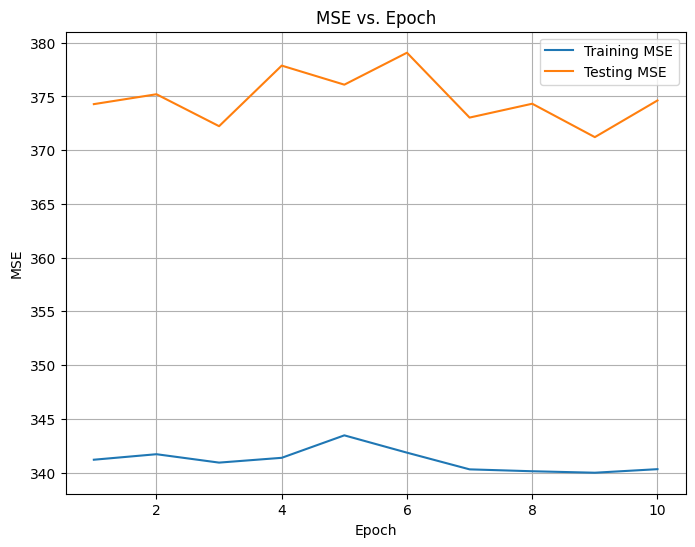

In [ ]:
train_mse = []
test_mse = []

# Training the model and capturing the MSE
epochs = 10  # You can adjust the number of epochs
for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs}")
    history = model.fit(X_train, y_train, epochs=1, verbose=0)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Plot the MSE vs. epoch curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_mse, label='Training MSE')
plt.plot(range(1, epochs + 1), test_mse, label='Testing MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()


# DNN

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, Dropout
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop


import tensorflow as tf
from tensorflow import keras

In [ ]:
X= data.values
y = df['AQI'].values

In [ ]:
X_trainD,X_testD, Y_trainD, Y_testD = train_test_split(X,y, test_size= 0.2, random_state=30)

In [ ]:
hidden_units1 = 256
hidden_units2 = 512
hidden_units3 = 1024
learning_rate = 0.01

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(units=64, input_dim = 3, activation='relu', kernel_initializer='normal', kernel_regularizer=keras.regularizers.l2(l=0.1)),
    Dense(hidden_units1, kernel_initializer='normal', activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.1)),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.1)),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.1)),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
# loss function
from tensorflow.keras.losses import MeanSquaredLogarithmicError

msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle,
    optimizer=Adam(learning_rate=learning_rate),
    metrics=[msle]
)
# train the model
history = model.fit(
    X_trainD,
    Y_trainD,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/50
102/102 [==============================] - 2s 6ms/step - loss: 8.8174 - mean_squared_logarithmic_error: 0.8095 - val_loss: 0.2953 - val_mean_squared_logarithmic_error: 0.2817
Epoch 2/50
102/102 [==============================] - 0s 5ms/step - loss: 0.2870 - mean_squared_logarithmic_error: 0.2774 - val_loss: 0.2958 - val_mean_squared_logarithmic_error: 0.2879
Epoch 3/50
102/102 [==============================] - 1s 5ms/step - loss: 0.2900 - mean_squared_logarithmic_error: 0.2753 - val_loss: 0.2937 - val_mean_squared_logarithmic_error: 0.2805
Epoch 4/50
102/102 [==============================] - 0s 5ms/step - loss: 0.2838 - mean_squared_logarithmic_error: 0.2744 - val_loss: 0.2883 - val_mean_squared_logarithmic_error: 0.2820
Epoch 5/50
102/102 [==============================] - 0s 5ms/step - loss: 0.2826 - mean_squared_logarithmic_error: 0.2731 - val_loss: 0.2898 - val_mean_squared_logarithmic_error: 0.2824
Epoch 6/50
102/102 [==============================] - 0s 5ms/step - lo

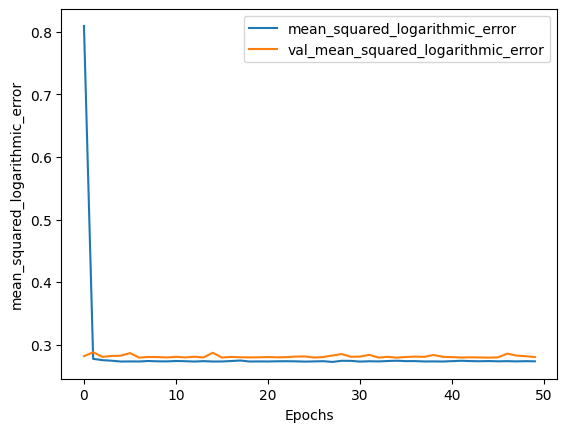

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')


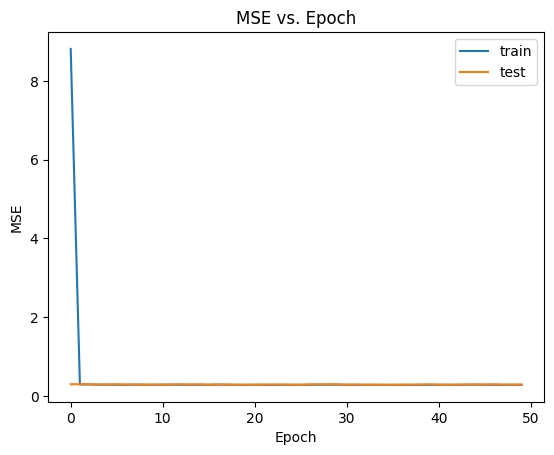

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs. Epoch')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_testD)


32/32 [==============================] - 0s 3ms/step


In [ ]:
df_testY = pd.DataFrame(Y_testD)
df_y_pred = pd.DataFrame(y_pred)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

Actual  Predicted
0        135  83.273766
1         31  83.273766
2        136  83.273766
3        109  83.273766
4         59  83.273766
...      ...        ...
1014     151  83.273766
1015     125  83.273766
1016     115  83.273766
1017     135  83.273766
1018     125  83.273766

[1019 rows x 2 columns]

In [ ]:
APE = 100 * (abs(df_results['Actual'] - df_results['Predicted']) / df_results['Actual'])
df_results['APE'] = APE

# Calculate the accuracy of the ANN model
accuracy = 100 - np.mean(APE)
print('The Accuracy of ANN model is:', accuracy)
df_results.head()

The Accuracy of ANN model is: 42.295588626891934


Actual  Predicted         APE
0     135  83.273766   38.315729
1      31  83.273766  168.625050
2     136  83.273766   38.769290
3     109  83.273766   23.602050
4      59  83.273766   41.141976

In [ ]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, Predictions))
print('r2 score :', r2_score(y_test, Predictions))


Mean Absolute Error: 14.920846891652852
Mean Squared Error: 410.4275631590934
Root Mean Squared Error: 20.259011899870472
Mean Absolute Percentage Error: 0.20578269671595223
r2 score : 0.7572304361332172
